<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/%EC%8B%A4%EC%8A%B507_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning with PyTorch 
### 실습07. Convolutional Neural Netword : MNISt 분류 모델

1. Import & Exploer Data
2. Train Model
3. Test Model
  
<img src="https://dl.dropbox.com/s/qabp24atubct5bd/mnist.png" width="400"/>


In [15]:
# Setting Device

import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(9)

# GPU 사용하는 경우 cuda 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(9)

print("Device is: ", device)

Device is:  cuda


#### 1. Import & Exploer Data

In [1]:
# 1-1. Import MNIST Dataset

import torchvision.datasets as datasets # 이미지 데이터
import torchvision.transforms as transforms # 이미지 데이터를 변환

train_set = datasets.MNIST(root='MNIST_data/', # 데이터를 저장할 경로
                           train=True, # 데이터 학습 여부
                           transform=transforms.ToTensor(), # 텐서로 변환, 0~255 -> 0~1 normalization
                           download=True) 

test_set = datasets.MNIST(root='MNIST_data/', # 데이터를 저장할 경로
                          train=False, # 데이터 학습 여부
                          transform=transforms.ToTensor(), # 텐서로 변환, 0~255 -> 0~1 normalization
                          download=True) 

100%|██████████| 9912422/9912422 [00:00<00:00, 152494750.32it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

100%|██████████| 28881/28881 [00:00<00:00, 10477959.85it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41908651.50it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 8179703.21it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [2]:
# 1-2. DataLoader 생성

from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(train_set, batch_size=batch_size)
test_loader = DataLoader(test_set, batch_size=batch_size)

print(len(train_loader)) # 60000/64 = 937.5
print(len(test_loader))  # 10000/64 = 156.25

938
157


In [9]:
# 1-3. Data Explore

#dataiter = iter(train_loader) #이 형식 X 5번째 줄로 통합
#images, labels = dataiter.next()
image, label = next(iter(train_loader))
print(image.shape, label.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


label:  tensor(5)


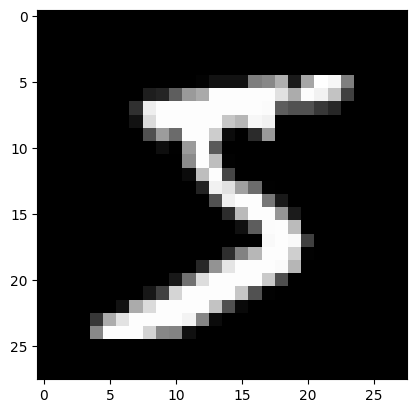

In [10]:
# 1-4. Image Data Visualize

import matplotlib.pyplot as plt

plt.imshow(image[0][0], cmap=plt.cm.gray)
print("label: ", label[0])

#### 2. Train Model

In [16]:
# 2-1. CNN Network

import torch
import torch.nn as nn
import torch.nn.functional as F

class model(nn.Module):
    def __init__(self):
        super().__init__()
        # input sample shape = (1, 28, 28) 
        # input_channel = 1
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1) 
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1) 
          
        self.maxpool = nn.MaxPool2d(2)  # 오버피팅을 방지하고, 연산에 들어가는 자원을 줄인다
        # maxpooling하면 12x12
        #self.dropout = nn.Dropout2d(p=0.2) # 랜덤한 20% 확률로 뉴런 비활성화, 오버피팅 방지
        self.linear1 = nn.Linear(64*12*12, 128) 
        self.linear2 = nn.Linear(128, 10) 

    def forward(self, input):
        output = F.relu(self.conv1(input)) 
        output = F.relu(self.conv2(output)) 
        output = self.maxpool(output)
        output = torch.flatten(output, 1) # 1차원으로 풀어줌
        # output = output.view(output.size(0), -1) # flatten()과 동일한 역할
        #output = self.dropout(output)
        output = F.relu(self.linear1(output)) 
        output = self.linear2(output) # output softmax 해야 하는데 왜 없을까? 밑에 답이 있음
        return output

model = model().to(device)

In [17]:
# 2-2. Loss Function & Optimizer

loss_function = nn.CrossEntropyLoss().to(device) # loss 함수에 이미 softmax 함수 연산 포함
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [18]:
# 2-3. Train Loop 

epochs = 10
train_losses = []

for epoch in range(epochs):
  train_loss = 0
  for (data, label) in train_loader:
      data = data.to(device)
      label = label.to(device)
      output = model(data)
      loss = loss_function(output, label)  
      
      optimizer.zero_grad()
      #Backpropagation
      loss.backward()
      optimizer.step()

      train_loss += loss.item()/len(train_loader)
      
  train_losses.append(train_loss)

  print("Epoch : {} the loss : {}".format(epoch, train_loss))

Epoch : 0 the loss : 0.1566778948017947
Epoch : 1 the loss : 0.04462647938294285
Epoch : 2 the loss : 0.02639294037802375
Epoch : 3 the loss : 0.016535434782297676
Epoch : 4 the loss : 0.01380337864733146
Epoch : 5 the loss : 0.009948156110173008
Epoch : 6 the loss : 0.00912326253438898
Epoch : 7 the loss : 0.007807315050973013
Epoch : 8 the loss : 0.005052747098488213
Epoch : 9 the loss : 0.005997821404651905


Text(0, 0.5, 'Loss')

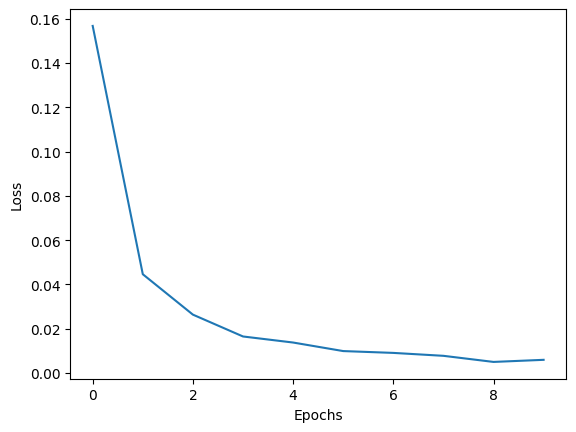

In [19]:
# 2-4. Loss Graph

plt.plot(range(epochs), train_losses)

plt.xlabel('Epochs')
plt.ylabel('Loss')

#### 3. Test Model

In [20]:
# 3. Test & Evaluate

total = 0
correct = 0
test_losses = 0

with torch.no_grad():
    for i, (data, label) in enumerate(test_loader):
        data = data.to(device)
        label = label.to(device)

        output = model(data)
        test_loss = loss_function(output, label).item()
        test_losses += test_loss/len(test_loader)
        
        correct_prediction = torch.argmax(output, 1) == label
        preds = torch.max(output.data, 1)[1] # output 값이 10개 label 각각에 대한 확률 값으로 나타나기 때문에, 가장 높은 값을 갖는 인덱스를 추출
        total += len(label) # 전체 데이터 개수 
        correct += (preds==label).sum().item()

print(f'Test loss: {test_losses:.4f}, Test acc: {correct/total*100:.3f}%')

Test loss: 0.0512, Test acc: 98.850%
